In [299]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
df_flats = pd.read_csv('sample_data/flats_all_info.csv')
df_flats

,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расттояние до центра,Площадь квартиры,Цена квартиры
0,"Продажа квартиры-студии 26 м², 12/22 этаж",Москва,САО,3.0,30.0,16.0,13.5,26.0,10200000.0
1,"Продажа 2-комнатной квартиры 51 м², 13/24 этаж",Москва,СВАО,3.0,27.0,11.0,12.1,51.0,15113952.0
2,"Продажа 3-комнатной квартиры 76,5 м², 12/52 этаж",Москва,ЗАО,3.0,21.0,15.0,10.7,76.5,35800000.0
3,"Продажа 1-комнатной квартиры 36,9 м², 12/14 этаж",Москва,ЮВАО,3.0,15.0,10.0,5.8,36.9,12500000.0
4,"Продажа 2-комнатной квартиры 77,4 м², 32/77 этаж",Москва,ЦАО,3.0,12.0,6.0,5.5,77.4,63500000.0
...,...,...,...,...,...,...,...,...,...
9654,"Продажа 3-комнатной квартиры 93,8 м², 6/6 этаж",Москва,СВАО,3.0,12.0,11.0,3.8,93.8,30000000.0
9655,"Продажа 1-комнатной квартиры 30 м², 3/5 этаж",Москва,ЦАО,3.0,16.0,12.0,4.3,30.0,16400000.0
9656,"Продажа 3-комнатной квартиры 83,8 м², 4/15 этаж",Москва,САО,3.0,47.0,39.0,24.9,83.8,14855729.0
9657,"Продажа 1-комнатной квартиры 43 м², 3/15 этаж",Москва,ЮАО,3.0,28.0,10.0,7.4,43.0,13000000.0


In [301]:
#Описание переменных
nominal = ['Город', 'Район']
numeric = ['Количество станций метро рядом', 'Самый длогий путь до метро', 'Самый короткий путь до метро', 'Расстояние до центра', "Площадь квартиры"]
target = ['Цена квартиры']

In [302]:
df_flats.rename(columns = {'Расттояние до центра':'Расстояние до центра'}, inplace = True )

In [303]:
#Посмотрю, где есть NaN
df_flats[df_flats.isnull().any(1)]


<ipython-input-303-b9737924c280>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_flats[df_flats.isnull().any(1)]


,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена квартиры
54,"Продажа 2-комнатной квартиры 52,7 м², 5/5 этаж",Москва,Новая Москва,0.0,NaN,NaN,15.0,52.7,5500000.0
187,"Продажа 2-комнатной квартиры 61 м², 5/8 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,61.0,13139156.0
193,"Продажа 1-комнатной квартиры 38,5 м², 2/5 этаж",Москва,Новая Москва,0.0,NaN,NaN,3.0,38.5,7700000.0
246,"Продажа 1-комнатной квартиры 39,8 м², 3/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,39.8,8927777.0
278,"Продажа квартиры-студии 25,7 м², 6/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,25.7,7119414.0
...,...,...,...,...,...,...,...,...,...
9353,"Продажа 3-комнатной квартиры 72,9 м², 8/9 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,72.9,16374506.0
9433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9496,"Продажа 2-комнатной квартиры 50,5 м², 8/9 этаж",Москва,Новая Москва,0.0,NaN,NaN,2.0,50.5,10000000.0
9509,"Продажа 2-комнатной квартиры 60,3 м², 8/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,60.3,12777329.0


Видно, что есть некоторые строчки, в которых не все пропуски, но сначала уберу полностью пустые

In [304]:
#Уберу полностью пустые строчки, которые появились во время парсинга (это было сделано для более простого парсинга, поскольку он часто вылетал и проще было перезапускатьс того-же места)
df_flats[df_flats.isnull().all(1)]

,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена квартиры
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
#Таких всего 10 позиций, что прекрасно, поэтому просто убераю их
df_flats = df_flats[df_flats.isnull().all(1)==False]

In [306]:
df_flats

,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена квартиры
0,"Продажа квартиры-студии 26 м², 12/22 этаж",Москва,САО,3.0,30.0,16.0,13.5,26.0,10200000.0
1,"Продажа 2-комнатной квартиры 51 м², 13/24 этаж",Москва,СВАО,3.0,27.0,11.0,12.1,51.0,15113952.0
2,"Продажа 3-комнатной квартиры 76,5 м², 12/52 этаж",Москва,ЗАО,3.0,21.0,15.0,10.7,76.5,35800000.0
3,"Продажа 1-комнатной квартиры 36,9 м², 12/14 этаж",Москва,ЮВАО,3.0,15.0,10.0,5.8,36.9,12500000.0
4,"Продажа 2-комнатной квартиры 77,4 м², 32/77 этаж",Москва,ЦАО,3.0,12.0,6.0,5.5,77.4,63500000.0
...,...,...,...,...,...,...,...,...,...
9654,"Продажа 3-комнатной квартиры 93,8 м², 6/6 этаж",Москва,СВАО,3.0,12.0,11.0,3.8,93.8,30000000.0
9655,"Продажа 1-комнатной квартиры 30 м², 3/5 этаж",Москва,ЦАО,3.0,16.0,12.0,4.3,30.0,16400000.0
9656,"Продажа 3-комнатной квартиры 83,8 м², 4/15 этаж",Москва,САО,3.0,47.0,39.0,24.9,83.8,14855729.0
9657,"Продажа 1-комнатной квартиры 43 м², 3/15 этаж",Москва,ЮАО,3.0,28.0,10.0,7.4,43.0,13000000.0


In [307]:
pd.set_option('display.max_rows', None)
df_flats[df_flats.isnull().any(1)]

<ipython-input-307-ce54f9cdc648>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_flats[df_flats.isnull().any(1)]


,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена квартиры
54,"Продажа 2-комнатной квартиры 52,7 м², 5/5 этаж",Москва,Новая Москва,0.0,NaN,NaN,15.0,52.7,5500000.0
187,"Продажа 2-комнатной квартиры 61 м², 5/8 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,61.0,13139156.0
193,"Продажа 1-комнатной квартиры 38,5 м², 2/5 этаж",Москва,Новая Москва,0.0,NaN,NaN,3.0,38.5,7700000.0
246,"Продажа 1-комнатной квартиры 39,8 м², 3/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,39.8,8927777.0
278,"Продажа квартиры-студии 25,7 м², 6/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,25.7,7119414.0
395,"Продажа 1-комнатной квартиры 37 м², 11/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,37.0,8719272.0
422,"Продажа квартиры-студии 25,7 м², 6/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,25.7,6952878.0
532,"Продажа квартиры-студии 25,7 м², 5/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,25.7,6980634.0
535,"Продажа квартиры-студии 25,4 м², 6/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,25.4,6871716.0
607,"Продажа 1-комнатной квартиры 37 м², 8/14 этаж",Москва,Новая Москва,3.0,75.0,64.0,NaN,37.0,8719272.0


Все пропуски вызваны тем, что в объявлениях из Новой москвы нет метро, поэтому я заменю максимальный и минимальный путь до метро (где он пропущен) на максимально возможное значение по Новой Москве(потому что логично, что если не указали близжайшее метро, то оно черезчур далеко находится), с расстоянием до центра поставлю медиану, за неимением лучшего варианта

In [308]:
 med_dist_NM = df_flats.loc[df_flats["Район"] == "Новая Москва"]['Расстояние до центра'].median()
 max_dist_sub_NM = max(df_flats[df_flats["Район"] == "Новая Москва"]['Самый длогий путь до метро'])
 max_dist_sub_UAO =  max(df_flats[df_flats["Район"] == "ЮАО"]['Самый длогий путь до метро'])
 med_dist_NM, max_dist_sub_NM, max_dist_sub_UAO

(23.6, 89.0, 41.0)

In [309]:
df_flats.loc[df_flats["Район"] == "Новая Москва", ['Самый длогий путь до метро', 'Самый короткий путь до метро']]

,Самый длогий путь до метро,Самый короткий путь до метро
7,28.0,14.0
16,28.0,14.0
18,79.0,68.0
28,36.0,31.0
30,32.0,25.0
31,44.0,37.0
39,35.0,17.0
40,30.0,13.0
45,62.0,52.0
51,28.0,14.0


In [310]:
pd.set_option('display.max_rows', 10)
#Ставлю медианы в расстояние
df_flats.loc[(df_flats["Район"] == "Новая Москва"), 'Расстояние до центра'] = (df_flats.loc[(df_flats["Район"] == "Новая Москва"), 'Расстояние до центра']).fillna(med_dist_NM)

subset = df_flats.loc[df_flats["Район"] == "Новая Москва", ["Самый длогий путь до метро", "Самый короткий путь до метро"]]
subset = subset.fillna(max_dist_sub_NM)
df_flats.loc[df_flats["Район"] == "Новая Москва", ["Самый длогий путь до метро", "Самый короткий путь до метро"]] = subset

subset = df_flats.loc[df_flats["Район"] == "ЮАО", ["Самый длогий путь до метро", "Самый короткий путь до метро"]]
subset = subset.fillna(max_dist_sub_UAO)
df_flats.loc[df_flats["Район"] == "ЮАО", ["Самый длогий путь до метро", "Самый короткий путь до метро"]] = subset


In [311]:
df_flats[df_flats.isnull().any(1)] #NaN больше нет

<ipython-input-311-7b2a0b5459b9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_flats[df_flats.isnull().any(1)] #NaN больше нет


,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена квартиры


#Визуализация

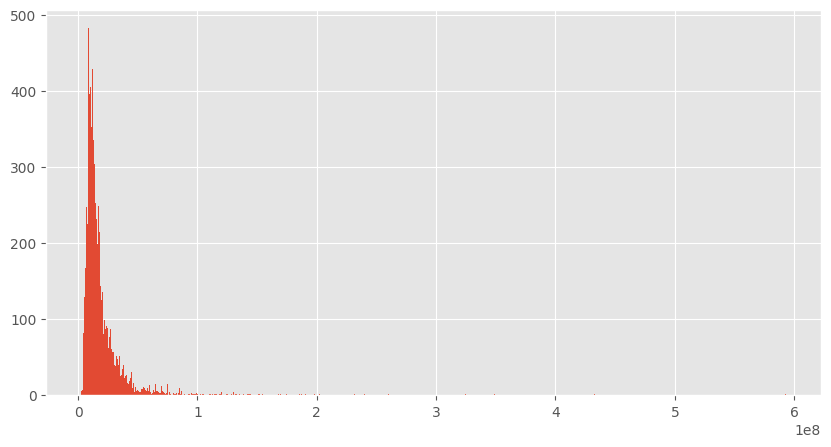

In [312]:
#посмотрим на так, какая гистограмма у цен, быть может получится увидеть какое-нибудь распределение
plt.figure(figsize = (10,5))

plt.hist(df_flats['Цена квартиры'], bins =1000)
plt.show()

In [313]:
#график получился достаточно непоказательным из-за слишком большого разброса, потому я хочу псмотреть на среднее, моду, медиану и на стандартное отклонение, чтобы сделать более-менее адекватный численный интервал

In [314]:
print(f" среднее по ценам: {df_flats['Цена квартиры'].mean()}, мода: {df_flats['Цена квартиры'].mode()}, медиана: {df_flats['Цена квартиры'].median()}, стандартное отклонение: {df_flats['Цена квартиры'].std()}")

 среднее по ценам: 19191304.828565504, мода: 0    12000000.0
Name: Цена квартиры, dtype: float64, медиана: 13800000.0, стандартное отклонение: 20760216.28708299


In [315]:
#сделаем ограничение в 40 миллионов, поскольку среднее + отклонение примерно даёт таакое число

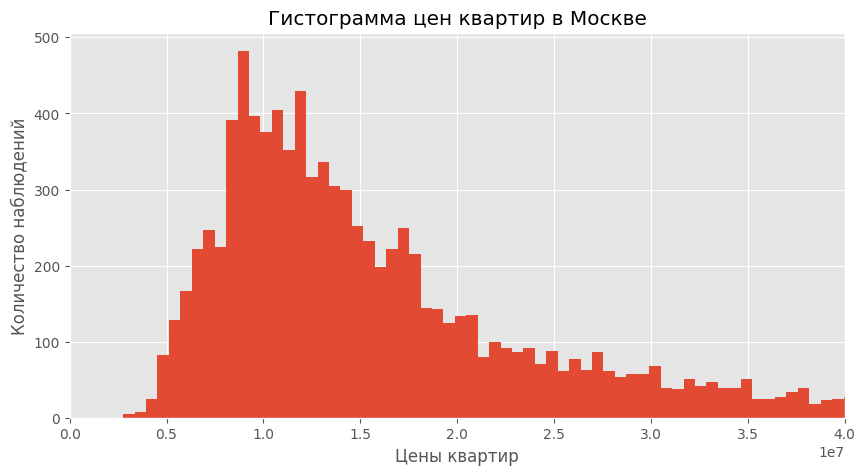

In [316]:
plt.figure(figsize = (10,5))

plt.xlim(0, 4*(10**7))
plt.hist(df_flats['Цена квартиры'], bins =1000)
plt.xlabel('Цены квартир')
plt.ylabel('Количество наблюдений')
plt.title('Гистограмма цен квартир в Москве')
plt.show()

Что-то похожее на Хи-квадрат получается, что интересено, но всё же познания в статистике говорят мне, что на 9,5к наблюдениях воспринимать не как нормальное слегка странно

In [317]:
#Теперь я хочу посмотреть на гистограммы цен по районам Mосквы
df_flats['Район'].value_counts()

ЮАО                         1395
Новая Москва                1239
САО                         1116
СВАО                         991
ЗАО                          987
                            ... 
ЮЗАО                         617
ЦАО                          495
Зеленоград                    70
ЮА                            15
городской округ Балашиха       1
Name: Район, Length: 13, dtype: int64

In [318]:
#Поскольку в ГО Балашихе только 1 квартира, уберу её из датафрейма вовсе, поскольку информации никакой, а мешаться будет она сильно
df_flats = df_flats.loc[df_flats['Район'] != "городской округ Балашиха"]

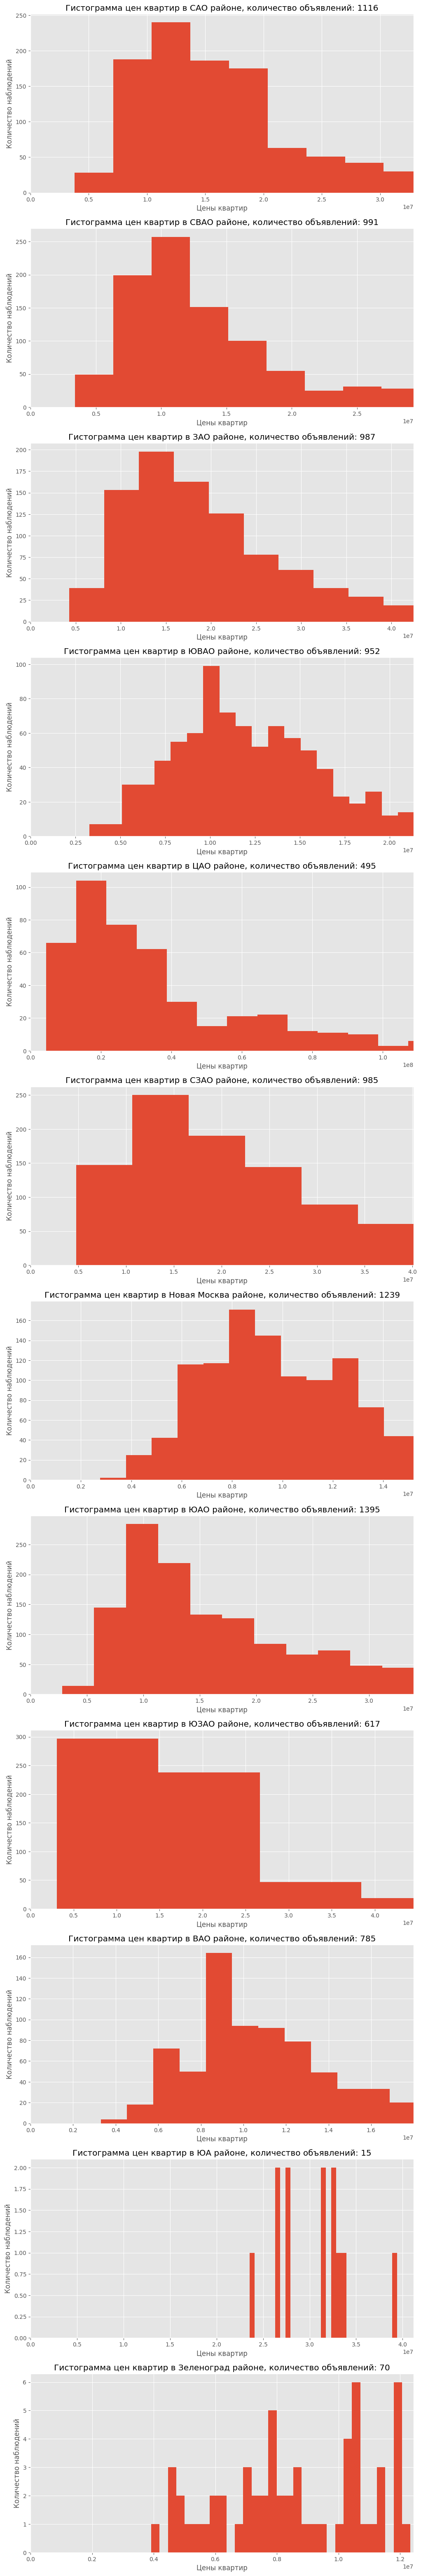

In [319]:
distr_list = df_flats['Район'].unique()

plt.figure(figsize=(12, 80))

for i in range(len(distr_list)):
  distr_i = df_flats.loc[df_flats['Район'] == distr_list[i], 'Цена квартиры']

  plt.subplot(len(distr_list), 1, i+1)
  plt.xlim(0, distr_i.mean()+distr_i.std())
  plt.hist(distr_i, bins = 50)
  plt.xlabel('Цены квартир')
  plt.ylabel('Количество наблюдений')
  plt.title(f'Гистограмма цен квартир в {distr_list[i]} районе, количество объявлений: {len(distr_i)}')


plt.show()

Можно увидеть, что там, где много наблюдений распределение похоже на нормальное, потому мне интересно проверить гипотезу о том, что разница по районам москвы дисперсии одинаковые, Для того, чтобы выбрать наиболее удачные выборки построю ящики с усами и возьму те выборки, в которых мало выбросов

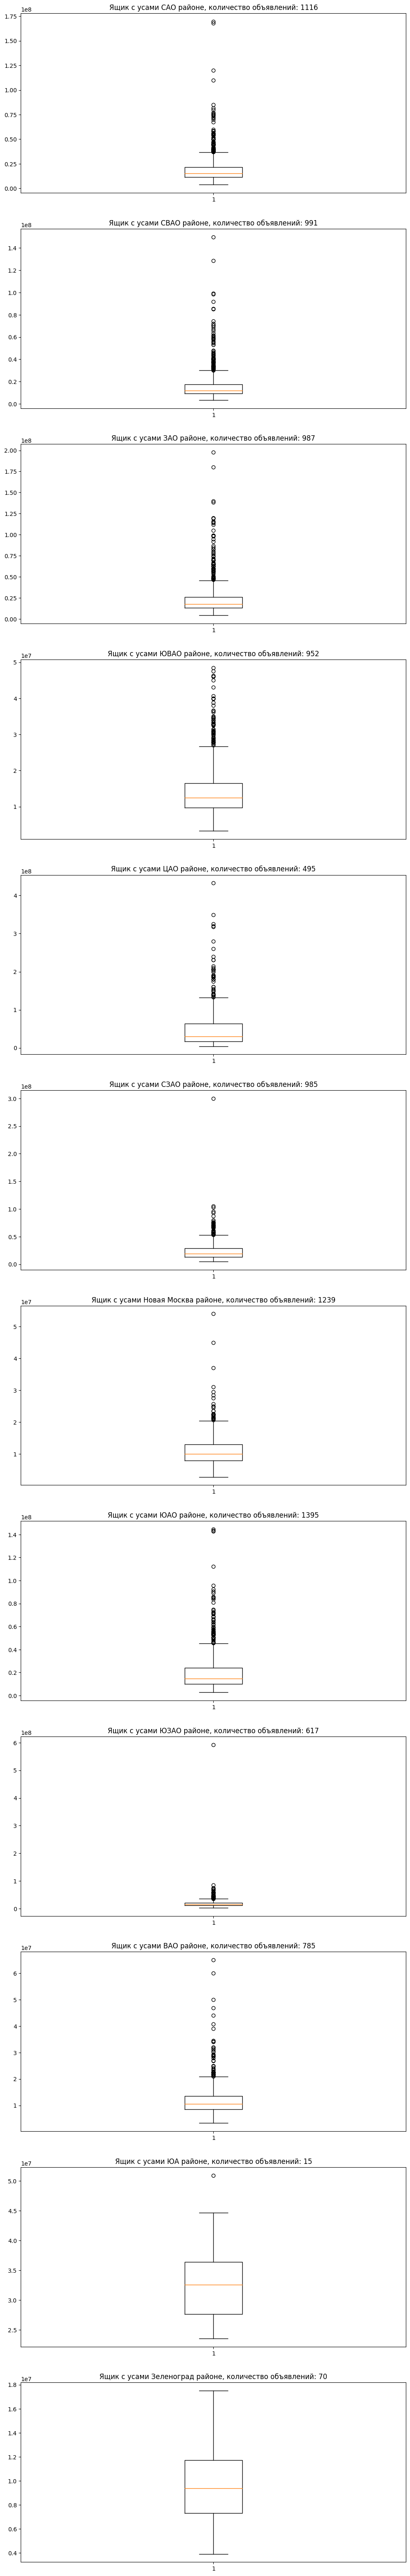

In [239]:
plt.figure(figsize=(12, 80))

for i in range(len(distr_list)):
  distr_i = df_flats.loc[df_flats['Район'] == distr_list[i], 'Цена квартиры']

  plt.subplot(len(distr_list), 1, i+1)
  plt.boxplot(distr_i)
  plt.title(f'Ящик с усами {distr_list[i]} районе, количество объявлений: {len(distr_i)}')


plt.show()

У районов достаточно много выбросов, но в сил того, что они устроены все примерно похоже, моя гипотеза о дисперсии становится для меня ещё более интересной
Также, мне интересно, насколько много выбросов будет у цен в целом

Text(0.5, 1.0, 'Ящик с усами всех цен')

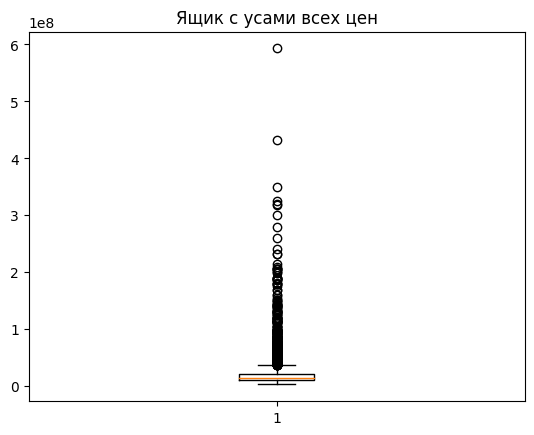

In [240]:
plt.boxplot(df_flats['Цена квартиры'])
plt.title(f'Ящик с усами всех цен')

Как можно заметить, в ценах без районов с выбросами всё совсем печально, есть несколько, которые слишком сильно выбиываются, что может повлиять на качество обучения модели, потому я уберу из датасета все объявления, цены которых выше 3*10^8


In [320]:
#смотрю, от каких данных отказываюсь, почти все квартиры из ЦАО, что неудивительно, но поскольку в ЦАО 495 наблюдений, от того, что я уберу 5 - реперзентативность не уменьшится
df_flats.loc[df_flats['Цена квартиры'] >= 3*(10**8)]

,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена квартиры
1964,Продажа квартиры со свободной планировкой 281 ...,Москва,ЦАО,3.0,14.0,7.0,0.0,281.0,320000000.0
2613,"Продажа многокомнатной квартиры 764 м², 14/14 ...",Москва,ЮЗАО,3.0,28.0,13.0,9.4,764.0,592999999.0
3057,"Продажа многокомнатной квартиры 489,1 м², 22/2...",Москва,СЗАО,3.0,29.0,23.0,10.5,489.1,300000000.0
4423,"Продажа квартиры со свободной планировкой 180,...",Москва,ЦАО,3.0,14.0,4.0,0.0,180.4,432725000.0
4717,"Продажа многокомнатной квартиры 310 м², 4/5 этаж",Москва,ЦАО,3.0,15.0,10.0,4.3,310.0,349000000.0
7253,"Продажа многокомнатной квартиры 234 м², 4/7 этаж",Москва,ЦАО,3.0,12.0,8.0,4.8,234.0,317990000.0
9396,"Продажа многокомнатной квартиры 305 м², 2/7 этаж",Москва,ЦАО,3.0,7.0,7.0,0.0,305.0,325000000.0


In [321]:
df_flats = df_flats.loc[df_flats['Цена квартиры'] <= 3*(10**8)]

In [322]:
df_flats

,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена квартиры
0,"Продажа квартиры-студии 26 м², 12/22 этаж",Москва,САО,3.0,30.0,16.0,13.5,26.0,10200000.0
1,"Продажа 2-комнатной квартиры 51 м², 13/24 этаж",Москва,СВАО,3.0,27.0,11.0,12.1,51.0,15113952.0
2,"Продажа 3-комнатной квартиры 76,5 м², 12/52 этаж",Москва,ЗАО,3.0,21.0,15.0,10.7,76.5,35800000.0
3,"Продажа 1-комнатной квартиры 36,9 м², 12/14 этаж",Москва,ЮВАО,3.0,15.0,10.0,5.8,36.9,12500000.0
4,"Продажа 2-комнатной квартиры 77,4 м², 32/77 этаж",Москва,ЦАО,3.0,12.0,6.0,5.5,77.4,63500000.0
...,...,...,...,...,...,...,...,...,...
9654,"Продажа 3-комнатной квартиры 93,8 м², 6/6 этаж",Москва,СВАО,3.0,12.0,11.0,3.8,93.8,30000000.0
9655,"Продажа 1-комнатной квартиры 30 м², 3/5 этаж",Москва,ЦАО,3.0,16.0,12.0,4.3,30.0,16400000.0
9656,"Продажа 3-комнатной квартиры 83,8 м², 4/15 этаж",Москва,САО,3.0,47.0,39.0,24.9,83.8,14855729.0
9657,"Продажа 1-комнатной квартиры 43 м², 3/15 этаж",Москва,ЮАО,3.0,28.0,10.0,7.4,43.0,13000000.0


Text(0.5, 1.0, 'Ящик с усами всех цен')

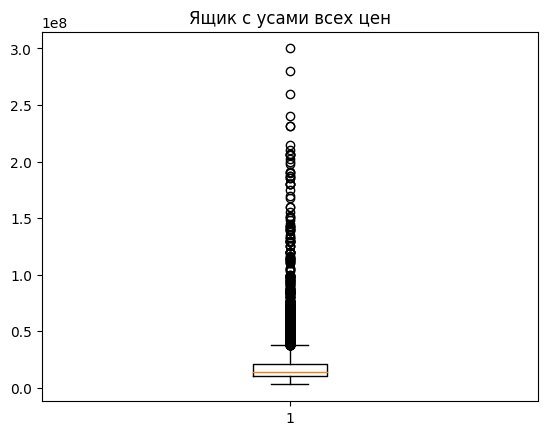

In [244]:
#смотрим, что получилось теперь
plt.boxplot(df_flats['Цена квартиры'])
plt.title(f'Ящик с усами всех цен')

Сильно лучше не стало, но хоть что-то. Начнём переделывать датафрейс к такому виду, чтобы можно было посторить линейную регрессию

In [245]:
#переделаем колонку с названиями районов под числа, чтоб можно было построить регрессию
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_flats['Район'])
list(le.classes_)

['ВАО',
 'ЗАО',
 'Зеленоград',
 'Новая Москва',
 'САО',
 'СВАО',
 'СЗАО',
 'ЦАО',
 'ЮА',
 'ЮАО',
 'ЮВАО',
 'ЮЗАО']

In [246]:
numeric_data = le.transform(df_flats['Район'])
numeric_data

array([4, 5, 1, ..., 4, 9, 9])

In [325]:
df_flats_ML = df_flats #вдруг мне ещё пригодится оригинальная таблица
df_flats_ML['Район'] = numeric_data
df_flats_ML

,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена квартиры
0,"Продажа квартиры-студии 26 м², 12/22 этаж",Москва,4,3.0,30.0,16.0,13.5,26.0,10200000.0
1,"Продажа 2-комнатной квартиры 51 м², 13/24 этаж",Москва,5,3.0,27.0,11.0,12.1,51.0,15113952.0
2,"Продажа 3-комнатной квартиры 76,5 м², 12/52 этаж",Москва,1,3.0,21.0,15.0,10.7,76.5,35800000.0
3,"Продажа 1-комнатной квартиры 36,9 м², 12/14 этаж",Москва,10,3.0,15.0,10.0,5.8,36.9,12500000.0
4,"Продажа 2-комнатной квартиры 77,4 м², 32/77 этаж",Москва,7,3.0,12.0,6.0,5.5,77.4,63500000.0
...,...,...,...,...,...,...,...,...,...
9654,"Продажа 3-комнатной квартиры 93,8 м², 6/6 этаж",Москва,5,3.0,12.0,11.0,3.8,93.8,30000000.0
9655,"Продажа 1-комнатной квартиры 30 м², 3/5 этаж",Москва,7,3.0,16.0,12.0,4.3,30.0,16400000.0
9656,"Продажа 3-комнатной квартиры 83,8 м², 4/15 этаж",Москва,4,3.0,47.0,39.0,24.9,83.8,14855729.0
9657,"Продажа 1-комнатной квартиры 43 м², 3/15 этаж",Москва,9,3.0,28.0,10.0,7.4,43.0,13000000.0


In [326]:
df_flats_ML.columns.values()[2:-1]

array(['Район', 'Количество станций метро рядом',
       'Самый длогий путь до метро', 'Самый короткий путь до метро',
       'Расстояние до центра', 'Площадь квартиры'], dtype=object)

In [327]:
#Начнём делать линейную регрессию

numeric_features = df_flats_ML.columns.values[2:-1]
target = 'Цена квартиры'


In [328]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_flats_ML[numeric_features], df_flats_ML[[target]], test_size = 0.2, random_state=0, stratify = df_flats_ML['Район']) #разделяем по районй, поскольку они представленные неравномерно

In [329]:
from sklearn.linear_model import LinearRegression #посмотрим какой результат даст стандартная линейная регрессия без какого-то дополнительного подбора параметров
model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)


In [330]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test, y_pred)

mse = mean_squared_error(Y_test, y_pred)

print(f'r2 = {r2}, mse = {mse}')

r2 = 0.5706327103336621, mse = 154430629861026.56


Огромный MSE и r2 чуть больше половины заставляет желать лучшего, потому поподбираем параметры при помощи гридсёрча

In [331]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False],
              'positive': [True, False],
              'copy_X': [True, False]}

gr_search = GridSearchCV(model, param_grid, scoring="r2", cv=4, n_jobs=-1)

gr_search.fit(X_train, Y_train)

gr_search.best_params_

{'copy_X': True, 'fit_intercept': False, 'positive': False}

In [332]:
y1_pred = (gr_search.best_estimator_).predict(X_test)

r2_1 = r2_score(Y_test, y1_pred)

mse_1 = mean_squared_error(Y_test, y1_pred)

print(f'r2 = {r2_1}, mse = {mse_1}')

r2 = 0.5706504581485046, mse = 154424246500461.56


Видимо, лучше обучить модель не получится, какие новые переменные можно добавить к датасету я предположить не могу, потому, к сожалению, более удачную регерссию построить я не смогу

Выдвину гипотезу о том, что на цены положительно влияет площадь квартиры и отрицатеьно самый долгий путь до метро. Проверю я это при помощи того, какие при коэффициенте у линейной регрессии стоят знаки

In [333]:
#Добавлю в датафрейм колонку "Цена за квадратный метр", потому как переменная, содержащая в себе цену сможет многое дать модели обучения, потому как в данный момент в датафрейме нет никаких ценовых характеристик
s2_price = df_flats_ML['Цена квартиры']/df_flats_ML['Площадь квартиры']
s2_price

0       392307.692308
1       296352.000000
2       467973.856209
3       338753.387534
4       820413.436693
            ...      
9654    319829.424307
9655    546666.666667
9656    177276.002387
9657    302325.581395
9658    433409.735099
Length: 9641, dtype: float64

In [334]:
df_flats_ML.insert(loc=8, column='Цена за квадратный метр', value=s2_price)

In [335]:
df_flats_ML

,Наименование объявления,Город,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена за квадратный метр,Цена квартиры
0,"Продажа квартиры-студии 26 м², 12/22 этаж",Москва,4,3.0,30.0,16.0,13.5,26.0,392307.692308,10200000.0
1,"Продажа 2-комнатной квартиры 51 м², 13/24 этаж",Москва,5,3.0,27.0,11.0,12.1,51.0,296352.000000,15113952.0
2,"Продажа 3-комнатной квартиры 76,5 м², 12/52 этаж",Москва,1,3.0,21.0,15.0,10.7,76.5,467973.856209,35800000.0
3,"Продажа 1-комнатной квартиры 36,9 м², 12/14 этаж",Москва,10,3.0,15.0,10.0,5.8,36.9,338753.387534,12500000.0
4,"Продажа 2-комнатной квартиры 77,4 м², 32/77 этаж",Москва,7,3.0,12.0,6.0,5.5,77.4,820413.436693,63500000.0
...,...,...,...,...,...,...,...,...,...,...
9654,"Продажа 3-комнатной квартиры 93,8 м², 6/6 этаж",Москва,5,3.0,12.0,11.0,3.8,93.8,319829.424307,30000000.0
9655,"Продажа 1-комнатной квартиры 30 м², 3/5 этаж",Москва,7,3.0,16.0,12.0,4.3,30.0,546666.666667,16400000.0
9656,"Продажа 3-комнатной квартиры 83,8 м², 4/15 этаж",Москва,4,3.0,47.0,39.0,24.9,83.8,177276.002387,14855729.0
9657,"Продажа 1-комнатной квартиры 43 м², 3/15 этаж",Москва,9,3.0,28.0,10.0,7.4,43.0,302325.581395,13000000.0


In [336]:
#Начнём делать линейную регрессию

numeric_features_new = df_flats_ML.columns.values[2:-1]
target = 'Цена квартиры'


In [337]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_flats_ML[numeric_features_new], df_flats_ML[[target]], test_size = 0.2, random_state=0, stratify = df_flats_ML['Район']) #разделяем по районй, поскольку они представленные неравномерно

In [338]:
from sklearn.linear_model import LinearRegression #посмотрим какой результат даст стандартная линейная регрессия без какого-то дополнительного подбора параметров
model_new = LinearRegression()

model_new.fit(X_train, Y_train)

y_pred_new = model_new.predict(X_test)


In [340]:
from sklearn.metrics import r2_score, mean_squared_error
r2_new = r2_score(Y_test, y_pred_new)

mse_new = mean_squared_error(Y_test, y_pred_new)

print(f'r2 = {r2_new}, mse = {mse_new}')

r2 = 0.8948193965529145, mse = 37830331351321.195


In [341]:
mse - mse_new

116600298509705.38

Как я и предполагал, Цена за квадратный метр дала очень много информации для модели, в результате чего r2 стал 0,9, а mse уменьшился на 116600298509705.38, что говорит об очень хороших результатах

Хоч проверить гипотезу о том, что самый долгий путь на метро отрицательно влияет на цену квартиры

In [343]:
pd.DataFrame(columns= numeric_features_new, data=model_new.coef_)

,Район,Количество станций метро рядом,Самый длогий путь до метро,Самый короткий путь до метро,Расстояние до центра,Площадь квартиры,Цена за квадратный метр
0,-11818.590702,513233.25168,11115.64247,63635.206235,768.935775,414946.231313,78.080593


Удивительно, но это не так, почему - я не могу предположить

Также, я бы хотел проверить гипотезу о том, что в районах с большим количством наблюдений (более 100), цены имеют нормальное распредеение, для этого я сначала построю доверительный интервал для МО, а затем воспользуюсь тестом колмогорова-смирннова

In [346]:
df_flats_ML['Район'].value_counts()[:-2]

9     1395
3     1239
4     1116
5      991
1      987
6      985
10     952
0      785
11     616
7      490
Name: Район, dtype: int64

In [348]:
dist_num = [9,3,4,5,1,6,10,0,11,7]

In [353]:
import math

In [358]:
#Предположим, что все выборки из нормального
def t_int(sample, a):
  return([sample.mean()-sts.t(len(sample)-1).ppf(1-a/2)*sample.std()/math.sqrt(len(sample)), sample.mean()+sts.t(len(sample)-1).ppf(1-a/2)*sample.std()/math.sqrt(len(sample))])

def t_disp(sample, a):
  v=0
  for i in sample:
    v+=(i-sample.mean())**2
  return(np.array([v/sts.chi2(len(sample)).ppf(1-a/2), v/sts.chi2(len(sample)).ppf(a/2)]))

In [359]:
me = []
dis = []
for i in range(len(dist_num)):
  t = t_int(df_flats_ML.loc[df_flats_ML['Район']==dist_num[i], "Цена квартиры"], 0.05)
  h = t_disp(df_flats_ML.loc[df_flats_ML['Район']==dist_num[i], "Цена квартиры"], 0.05)
  me.append((t[0]+t[1])/2)
  dis.append((h[0]+h[1])/2)
  print(f'ДИ для МО {dist_num[i]}: {t}')

ДИ для МО 9: [18677261.32089449, 20201472.960109096]
ДИ для МО 3: [10606315.375792254, 11092272.127032604]
ДИ для МО 4: [18262476.280810863, 19883375.471877307]
ДИ для МО 5: [15414658.252226396, 17046152.90619944]
ДИ для МО 1: [22295605.9491461, 24665984.275777914]
ДИ для МО 6: [22174534.544856112, 24286169.095753025]
ДИ для МО 10: [13752077.270137634, 14659485.767677493]
ДИ для МО 0: [11516962.331945993, 12365106.391620886]
ДИ для МО 11: [17081235.832590822, 18820482.06675983]
ДИ для МО 7: [44041595.14525387, 52709521.18127674]


In [357]:
me

[19439367.140501793,
 10849293.751412429,
 19072925.876344085,
 16230405.579212919,
 23480795.112462007,
 23230351.82030457,
 14205781.518907564,
 11941034.36178344,
 17950858.949675325,
 48375558.1632653]

In [365]:
from scipy.stats import kstest

for i in range(len(dist_num)):
  print(kstest(df_flats_ML.loc[df_flats_ML['Район']==dist_num[i], "Цена квартиры"], sts.norm(me[i], dis[i]).cdf ))

KstestResult(statistic=0.4999999685802929, pvalue=0.0, statistic_location=2800000.0, statistic_sign=-1)
KstestResult(statistic=0.4999998309089944, pvalue=5.980824087345131e-287, statistic_location=2763000.0, statistic_sign=-1)
KstestResult(statistic=0.4999999680781636, pvalue=1.6255392464502492e-258, statistic_location=3772000.0, statistic_sign=-1)
KstestResult(statistic=0.49999997025417764, pvalue=1.2815880262642717e-229, statistic_location=3400000.0, statistic_sign=-1)
KstestResult(statistic=0.4999999788264784, pvalue=1.0775468831170252e-228, statistic_location=4280000.0, statistic_sign=-1)
KstestResult(statistic=0.4999999742952128, pvalue=3.1245585745168805e-228, statistic_location=4769000.0, statistic_sign=-1)
KstestResult(statistic=0.4999999148469085, pvalue=1.3291923333723235e-220, statistic_location=3290000.0, statistic_sign=-1)
KstestResult(statistic=0.4999999064774648, pvalue=5.365975159931074e-182, statistic_location=3300000.0, statistic_sign=-1)
KstestResult(statistic=0.4999

Гипотезы не подтвердились, p-value черезчур низкие